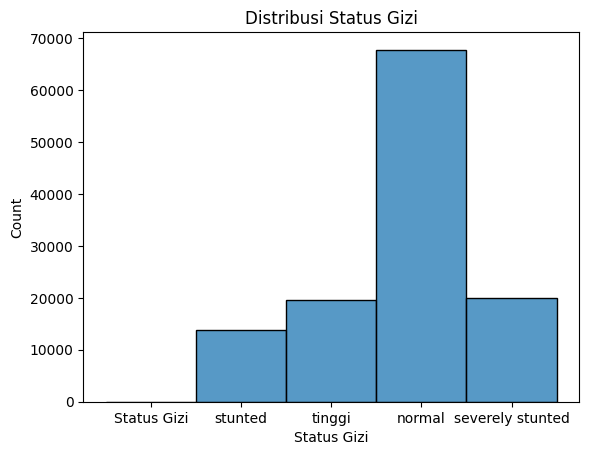

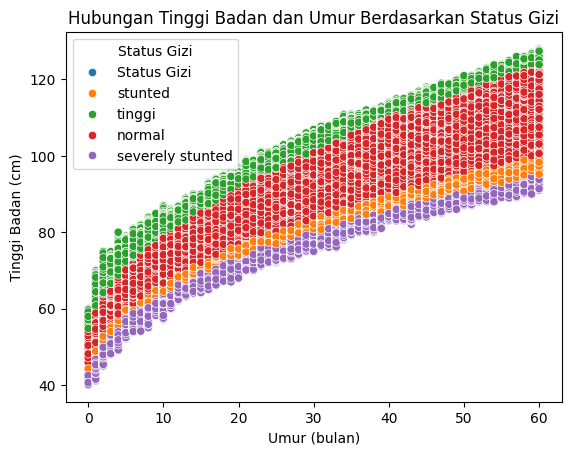

Confusion Matrix:
[[    0     1     0     0     0]
 [    0 17469  2657     0     0]
 [    0  3566  2491     0     0]
 [    0  3290   874     0     0]
 [    0  4884  1068     0     0]]

Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                  precision    recall  f1-score   support

     Status Gizi       0.00      0.00      0.00         1
          normal       0.60      0.87      0.71     20126
severely stunted       0.35      0.41      0.38      6057
         stunted       0.00      0.00      0.00      4164
          tinggi       0.00      0.00      0.00      5952

        accuracy                           0.55     36300
       macro avg       0.19      0.26      0.22     36300
    weighted avg       0.39      0.55      0.46     36300


Accuracy Score:
0.5498622589531681


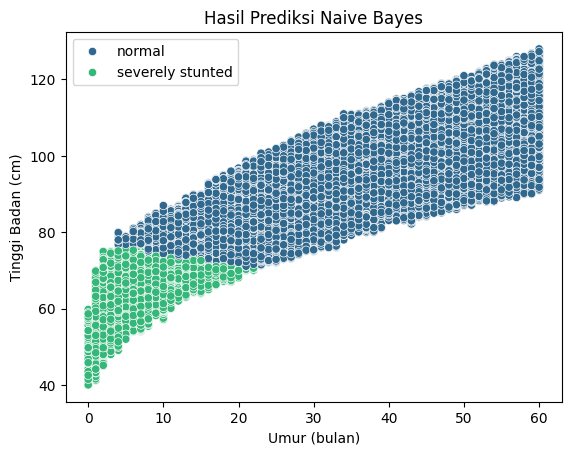

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer

# Membaca data
columns = ["Umur (bulan)", "Jenis Kelamin", "Tinggi Badan (cm)", "Status Gizi"]
df = pd.read_csv(r'data_balita.csv', names=columns)

# Konversi kolom numerik dan tangani nilai NaN
for col in ["Umur (bulan)", "Tinggi Badan (cm)"]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Imputasi nilai NaN dengan mean
imputer = SimpleImputer(strategy='mean')
df[["Umur (bulan)", "Tinggi Badan (cm)"]] = imputer.fit_transform(df[["Umur (bulan)", "Tinggi Badan (cm)"]])

# Visualisasi distribusi status gizi
sns.histplot(df["Status Gizi"], kde=False)
plt.title("Distribusi Status Gizi")
plt.show()

# Visualisasi hubungan antara tinggi badan dan umur
sns.scatterplot(data=df, x="Umur (bulan)", y="Tinggi Badan (cm)", hue="Status Gizi")
plt.title("Hubungan Tinggi Badan dan Umur Berdasarkan Status Gizi")
plt.show()

# Persiapan data untuk Naive Bayes
X = df[["Umur (bulan)", "Tinggi Badan (cm)"]]
y = df["Status Gizi"]

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inisialisasi dan pelatihan model Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Prediksi data uji
y_pred = model.predict(X_test)

# Evaluasi model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Visualisasi prediksi
sns.scatterplot(x=X_test["Umur (bulan)"], y=X_test["Tinggi Badan (cm)"], hue=y_pred, palette="viridis")
plt.title("Hasil Prediksi Naive Bayes")
plt.show()
